# https://plotly.com/python/plotly-express/

# 📈 7. SZEKCIÓ – Vizualizáció

In [1]:
import pandas as pd

df = pd.read_csv("ECommerce_consumer_behaviour.csv", encoding='utf-8', sep=',', nrows=100000)
df.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree


## Rajzolj barchartot: department → rendelés darabszám.

In [2]:
df_dep_orders = df.groupby('department')['order_id'].count().reset_index()

In [3]:
import plotly.express as px
px.bar

<function plotly.express._chart_types.bar(data_frame=None, x=None, y=None, color=None, pattern_shape=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, text=None, base=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, pattern_shape_sequence=None, pattern_shape_map=None, range_color=None, color_continuous_midpoint=None, opacity=None, orientation=None, barmode='relative', log_x=False, log_y=False, range_x=None, range_y=None, text_auto=False, title=None, subtitle=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure>

In [4]:
import plotly.io as pio
import plotly.express as px
import pandas as pd

fig = px.bar(df_dep_orders, x="order_id", y="department", 
             title='Orders by department', 
             text_auto = True, # érték felirat a bar-on
             color='order_id', # A color-ral a színezendő oszlopot adom meg
             template='ggplot2', # Available templates: 'ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 'plotly_dark', 
                                 # 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none'
             labels = {    # Renaming the original column names in the hover and legends
                 'department': 'Department',
                 'order_id': 'Orders'
             }
            ) 
fig.update_layout(height=700, width=900, 
                  yaxis_categoryorder='total ascending', 
                  title_x=0.5, # 0:balra zárt, 0.5:középen, 1:jobbra zárt
                  title_subtitle_text='count of orders',
                  plot_bgcolor = 'white',
                  yaxis_title = ''
                 )
fig.update_xaxes(visible=False)
fig.update_traces(text = ['{:.2f}k'.format(x/1e3) for x in df_dep_orders['order_id']]) # nem működik
fig.show()

## Line chart: óránkénti rendelés eloszlás (order_hour_of_day).

In [5]:
df_order_hour_of_day = df.groupby('order_hour_of_day')['order_id'].count().reset_index()

In [6]:
import plotly.express as px
px.line

<function plotly.express._chart_types.line(data_frame=None, x=None, y=None, line_group=None, color=None, line_dash=None, symbol=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, line_dash_sequence=None, line_dash_map=None, symbol_sequence=None, symbol_map=None, markers=False, log_x=False, log_y=False, range_x=None, range_y=None, line_shape=None, render_mode='auto', title=None, subtitle=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure>

In [7]:
import plotly.express as px

fig_order_hour_of_day = px.line(df_order_hour_of_day, x='order_hour_of_day', y='order_id',
                               hover_name='order_hour_of_day',
                               labels = {'order_hour_of_day': 'Hour', 'order_id': 'Orders'},
                               template = 'gridon'
                               )
fig_order_hour_of_day.update_layout(
    yaxis_title='', plot_bgcolor='white',
    width=800
)
fig_order_hour_of_day.update_xaxes(
    tickmode='array',
    tickvals=list(range(24))
)
fig_order_hour_of_day.show()

## Pie chart: reorder vs new order arány.

In [8]:
import pandas as pd

# Eredeti kétoszlopos dataframe
result = pd.DataFrame({
    'reordered': [(df['reordered'] == 1).sum()],
    'new_order': [(df['reordered'] == 0).sum()]
})

# Átalakítás hosszú formátumra, mert a pie chart ilyet nyel be
result_long = result.melt(
    value_vars=['reordered', 'new_order'],
    var_name='order_type',
    value_name='count'
)

In [9]:
import plotly.express as px
px.pie

<function plotly.express._chart_types.pie(data_frame=None, names=None, values=None, color=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, color_discrete_sequence=None, color_discrete_map=None, hover_name=None, hover_data=None, custom_data=None, category_orders=None, labels=None, title=None, subtitle=None, template=None, width=None, height=None, opacity=None, hole=None) -> plotly.graph_objs._figure.Figure>

In [10]:
import pandas as pd
import plotly.express as px

# Pie chart
fig = px.pie(result_long, names='order_type', values='count',
             title='Reorder vs New Order arány', hole=0.6,
            labels={'order_type': 'Order Type', 'new_order': 'New orders', 'reordered': 'Reordered'})
fig.update_layout(title_x=0.5)
fig.show()

## Stacked bar chart: order_dow szerint department megoszlás.

In [11]:
filtered_department = ['produce','dairy eggs','snacks','beverages','frozen']
df_order_dow_department = df[df['department'].isin(filtered_department)][['order_dow','department']]
df_order_dow_department_pivot = (
    df_order_dow_department.groupby(['order_dow','department']).size().unstack(fill_value=0)
)
df_order_dow_department_pivot

department,beverages,dairy eggs,frozen,produce,snacks
order_dow,,,,,
0,1489,3422,1464,6163,1509
1,1505,2945,1142,5505,1761
2,1071,2072,887,3411,1106
3,1013,1852,756,3221,1062
4,984,1937,731,3244,1059
5,1121,2085,885,3603,1134
6,1037,2369,1156,3997,1101


In [12]:
import plotly.express as px
px.bar

<function plotly.express._chart_types.bar(data_frame=None, x=None, y=None, color=None, pattern_shape=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, text=None, base=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, pattern_shape_sequence=None, pattern_shape_map=None, range_color=None, color_continuous_midpoint=None, opacity=None, orientation=None, barmode='relative', log_x=False, log_y=False, range_x=None, range_y=None, text_auto=False, title=None, subtitle=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure>

In [13]:
import plotly.express as px

day_name = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

fig_order_dow_department = px.bar(df_order_dow_department_pivot, 
                                x=df_order_dow_department_pivot.index, 
                                y=df_order_dow_department_pivot.columns, 
                                title='Department eloszlás order_dow szerint')
fig_order_dow_department.update_layout(
    barmode='stack',
    xaxis_title='',
    yaxis_title='Orders count',
    title_x=0.5,
    plot_bgcolor='white'
)
fig_order_dow_department.update_xaxes(
    tickmode='array',
    tickvals=list(range(len(day_name))),
    ticktext=day_name
)
fig_order_dow_department.show()

## Heatmap – Melyik nap melyik órájában rendelnek a legtöbbet?

In [14]:
import pandas as pd

df_frequency = df[['order_dow','order_hour_of_day']]
df_frequency_pivot = (
    df_frequency.groupby(['order_dow','order_hour_of_day']).size().unstack(fill_value=0)
)
df_frequency_pivot

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,160,85,71,16,11,32,101,430,946,1430,...,1774,1577,1562,1257,1099,530,551,546,464,361
1,59,31,55,66,20,77,100,642,1112,1563,...,1264,1266,1565,1008,946,692,316,438,252,207
2,113,27,7,60,45,39,84,399,630,935,...,1020,953,1161,581,684,497,323,381,283,107
3,78,12,47,0,0,73,101,338,501,1054,...,879,769,921,886,617,469,406,235,335,106
4,80,79,17,5,7,98,95,404,473,708,...,916,1122,867,704,703,579,345,219,302,179
5,98,57,19,24,12,13,167,456,596,961,...,1158,958,944,969,809,521,290,299,213,116
6,199,68,40,0,33,4,79,284,817,926,...,1166,1155,1145,805,816,579,467,297,261,227


In [15]:
import plotly.express as px
px.imshow

<function plotly.express._imshow.imshow(img, zmin=None, zmax=None, origin=None, labels={}, x=None, y=None, animation_frame=None, facet_col=None, facet_col_wrap=None, facet_col_spacing=None, facet_row_spacing=None, color_continuous_scale=None, color_continuous_midpoint=None, range_color=None, title=None, template=None, width=None, height=None, aspect=None, contrast_rescaling=None, binary_string=None, binary_backend='auto', binary_compression_level=4, binary_format='png', text_auto=False) -> plotly.graph_objs._figure.Figure>

In [16]:
import plotly.express as px

day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

fig_frequency = px.imshow(
    df_frequency_pivot,
    labels={
        'x': 'Hours',
        'y': 'Day of Week',
        'color': 'Count'
    },
    color_continuous_scale="Blues",
    aspect="auto", # auto: full screen, equal:square
    title='Ordering frequency',
    text_auto=True
)
fig_frequency.update_layout(
    title_x=0.5,
    yaxis_title='',
    xaxis_title=''
)
fig_frequency.update_xaxes(
    tickmode='array',
    tickvals=list(range(24))
)
fig_frequency.update_yaxes(
    tickmode='array',
    tickvals=list(range(len(day_names))),
    ticktext=day_names
)
fig_frequency.show()

## Bar – Mely departmentekben a legnagyobb a kosárméret szórása?

In [17]:
df_dep_order = (
    df.groupby(['department','order_id'])['product_id']
      .count()
      .reset_index(name='product_count')
)

df_dep_std = (
    df_dep_order.groupby(['department'])['product_count']
                .std()
                .reset_index(name='basket_size_std')
                .sort_values(by='basket_size_std', ascending=False)
)
df_dep_std

,department,basket_size_std
19,produce,3.134444
1,babies,2.642562
7,dairy eggs,1.795832
20,snacks,1.766429
0,alcohol,1.612033
3,beverages,1.486393
10,frozen,1.426822
18,pets,1.408176
11,household,1.120234
16,pantry,1.105069


In [18]:
import plotly.express as px
px.box

<function plotly.express._chart_types.box(data_frame=None, x=None, y=None, color=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, orientation=None, boxmode=None, log_x=False, log_y=False, range_x=None, range_y=None, points=None, notched=False, title=None, subtitle=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure>

In [19]:
import plotly.express as px

fig = px.bar(df_dep_std,
             x='department',
             y='basket_size_std',
             title='Basket size distribution by department')

fig.update_layout(
    yaxis_title='Basket size',
    xaxis_title='',
    title_x=0.5,
    plot_bgcolor='white'
)

fig.show()


## Box – Mely departmentekben a legnagyobb a kosárméret szórása?

In [20]:
# Létrehozzuk a kosárméret (basket_size) táblát
filtered_department = ['produce','dairy eggs','snacks']
df_basket = df[df['department'].isin(filtered_department)]
df_basket = (
    df_basket.groupby(['order_id','department'])
    .agg(basket_size=('product_id','count'))
    .reset_index()
)

In [21]:
# Departmentek rendezése szórás alapján
dept_std = (
    df_basket.groupby('department')['basket_size']
    .std()
    .sort_values(ascending=False)
)

In [22]:
# Rendezett department lista
ordered_departments = dept_std.index.tolist()

In [23]:
# Box plot
import plotly.express as px

fig = px.box(
    df_basket,
    x='department',
    y='basket_size',
    category_orders={'department': ordered_departments},
    color='department',
    title='Basket size distribution by department (sorted by variance)'
)

fig.update_layout(
    xaxis_title='',
    yaxis_title='Basket size',
    title_x=0.5,
    plot_bgcolor='white',
    showlegend=False,
    height=650
)

fig.update_xaxes(tickangle=45)
fig.show()

## Violin – Mely departmentekben a legnagyobb a kosárméret szórása?

In [24]:
# A dataframe-ek az előző számításból (Box) jönnek
import plotly.express as px

fig_violin = px.violin(
    df_basket,
    x='department',
    y='basket_size',
    category_orders={'department': ordered_departments},
    color='department',
    box=True,         # box plot overlay
    points='all',     # egyedi pontok megjelenítése
    title='Basket size distribution by department (violin plot, sorted by variance)'
)

fig_violin.update_layout(
    xaxis_title='',
    yaxis_title='Basket size',
    title_x=0.5,
    plot_bgcolor='white',
    showlegend=False,
    height=650
)

fig_violin.update_xaxes(tickangle=45)
fig_violin.show()

## Histogram – Customer lead time (days_since_prior_order) eloszlása

In [25]:
import pandas as pd

df_lead = df[['order_id','days_since_prior_order']].dropna().drop_duplicates()
df_lead.head()

,order_id,days_since_prior_order
22,1201011,3.0
37,1906860,3.0
48,2766469,6.0
63,3195784,7.0
71,1304367,30.0


In [26]:
import plotly.express as px
px.histogram

<function plotly.express._chart_types.histogram(data_frame=None, x=None, y=None, color=None, pattern_shape=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, pattern_shape_sequence=None, pattern_shape_map=None, marginal=None, opacity=None, orientation=None, barmode='relative', barnorm=None, histnorm=None, log_x=False, log_y=False, range_x=None, range_y=None, histfunc=None, cumulative=None, nbins=None, text_auto=False, title=None, subtitle=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure>

In [27]:
import plotly.express as px
import pandas as pd

days = df_lead['days_since_prior_order'].unique()

fig_lead = px.histogram(
    df_lead
    ,x='days_since_prior_order'
    ,labels={'days_since_prior_order':'Days since prior order'}
    ,title='Distribution of customer lead time'
    ,width=900
    ,height=500
    ,text_auto=True
)
fig_lead.update_layout(
    title_x=0.5
    ,plot_bgcolor='white'
    ,yaxis_title='Count of purchases'
)
fig_lead.update_xaxes(
    tickmode='array'
    ,tickvals=days
)
fig_lead.show()

## Scatter plot – Kosárméret (items per order) vs. rendelési időpont (order_hour_of_day)
Insight: bizonyos napszakokban nagyobb bevásárlást csinálnak az emberek?

In [28]:
# Kosárméret: termékszám rendelésenként
df_order_sizes = (
    df.groupby(['order_id', 'order_hour_of_day'])
      .agg(items_in_order=('product_id', 'count'))
      .reset_index()
)

import plotly.express as px

fig = px.scatter(
    df_order_sizes,
    x='order_hour_of_day',
    y='items_in_order',
    opacity=0.4,
    labels={
        'order_hour_of_day': 'Rendelési óra',
        'items_in_order': 'Kosárméret (db)'
    },
    title='Kosárméret vs. Rendelési időpont',
    template='gridon',
    height=600
)

fig.update_layout(
    title_x=0.5
    ,plot_bgcolor='white'
)

fig.update_xaxes(
    tickmode='array'
    ,tickvals=list(range(24))
)

fig.show()

## Treemap – A top 20 legnagyobb kategória eloszlása department szerint
(Összevonva: department > product_name)
Insight: mely termékek dominálnak az egyes kategóriákban.

In [29]:
df_top20 = (
    df.groupby(['department','product_name'])
      .agg(product_count=('product_name','count'))
      .reset_index()
      .sort_values(by='product_count', ascending=False)
      .head(20)
)
df_top20

,department,product_name,product_count
118,produce,fresh fruits,11499
120,produce,fresh vegetables,10457
122,produce,packaged vegetables fruits,5336
42,dairy eggs,yogurt,4470
38,dairy eggs,packaged cheese,3006
36,dairy eggs,milk,2731
21,beverages,water seltzer sparkling water,2489
124,snacks,chips pretzels,2225
40,dairy eggs,soy lactosefree,1954
10,bakery,bread,1753


In [30]:
import plotly.express as px
px.treemap

<function plotly.express._chart_types.treemap(data_frame=None, names=None, values=None, parents=None, ids=None, path=None, color=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, color_discrete_sequence=None, color_discrete_map=None, hover_name=None, hover_data=None, custom_data=None, labels=None, title=None, subtitle=None, template=None, width=None, height=None, branchvalues=None, maxdepth=None) -> plotly.graph_objs._figure.Figure>

In [31]:
import plotly.express as px

fig_top20 = px.treemap(
    df_top20
    ,path=['department','product_name']
    ,values='product_count'
    ,template='seaborn'
)
fig_top20.update_layout(
    title='Top 20 products by department'
    ,title_x=0.5
    ,height=500
)
fig_top20.update_traces(
    textinfo='label+value'  # Options: 'label', 'value', 'percent entry', 'percent parent', 'label+value', 'label+value+percent entry'
)
fig_top20.show()

## Bar chart – Top 20 termék reorder rate alapján sorba rendezve
Metric: reorder_rate = sum(reordered)/count(*)
Insight: mely termékeket veszik újra és újra → készletezés, promóció.

Minden egyes product_name esetén:
Megszámolni, hogy hányszor szerepel (összes vásárlás darabszáma)
Megszámolni, hogy ezek közül hány esetben volt reordered = 1
Ebből kiszámolni a reorder_rate-et
Az egészet egy DataFrame-be rendezni

In [32]:
df_reorder_rate = (
    df.groupby('product_name')
      .agg(
          total_orders=('product_name','count'),
          total_reorders=('reordered','sum')
      )
      .assign(reorder_rate=lambda x: x['total_reorders'] / x['total_orders'] * 100).round(0)
      .sort_values(by='reorder_rate', ascending=False)
      .head(20)
      .reset_index()
)
df_reorder_rate.head()

,product_name,total_orders,total_reorders,reorder_rate
0,milk,2731,2123,78.0
1,water seltzer sparkling water,2489,1776,71.0
2,fresh fruits,11499,8169,71.0
3,eggs,1385,976,70.0
4,cream,1008,696,69.0


In [33]:
import plotly.express as px

fig_reorder_rate = px.bar(
    df_reorder_rate
    ,x='product_name'
    ,y='reorder_rate'
    ,text_auto=True
)
fig_reorder_rate.update_layout(
    title='Top20 products on reorder rate'
    ,title_x=0.5
    ,plot_bgcolor='white'
    ,height=400
    ,xaxis_title=''
    ,yaxis_title='Rorder rate'
)
fig_reorder_rate.show()

## Line chart – Reorder arány változása order_number szerint
Mutasd meg, hogy ahogy nő a user vásárlási száma (order_number), nő-e a hűség.
Insight: customer lifecycle megértése.

In [34]:
df_reorder_by_ordernum = (
    df.groupby('order_number')
      .agg(
          reordered_sum=('reordered', 'sum'),
          total_orders=('reordered', 'count')
      )
      .assign(reorder_rate=lambda x: x['reordered_sum'] / x['total_orders'] * 100).round(0)
      .reset_index()
)
df_reorder_by_ordernum.head()

,order_number,reordered_sum,total_orders,reorder_rate
0,1,0,6549,0.0
1,2,1616,6308,26.0
2,3,2258,5833,39.0
3,4,2426,5369,45.0
4,5,2606,5298,49.0


In [35]:
import plotly.express as px

fig = px.line(
    df_reorder_by_ordernum,
    x='order_number',
    y='reorder_rate',
    markers=True,
)
fig.update_layout(
    plot_bgcolor='white'
    ,template='gridon'
)
fig.show()

## Sunburst chart – Department → product_name → reorder arány
Insight: mely termékek okozzák a kategória hűségét.

In [36]:
df_product = (
    df.groupby(['department','product_name'])
      .agg(
          total_orders=('reordered', 'count'), # hozzáadjuk a dataframe-hez ezt az oszlopot
          total_reorders=('reordered', 'sum')  # hozzáadjuk a dataframe-hez ezt az oszlopot
      ).reset_index()
)

df_product['reorder_rate'] = (  # hozzáadjuk a dataframe-hez ezt az oszlopot
    df_product['total_reorders'] / df_product['total_orders'] * 100
).round(0)

df_product_top3 = (
    df_product
    .sort_values(['department','reorder_rate'], ascending=False)
    .groupby('department')
    .head(3)
    .reset_index(drop=True)
)

df_product_top3.head(50)

,department,product_name,total_orders,total_reorders,reorder_rate
0,snacks,mint gum,62,40,65.0
1,snacks,trail mix snack mix,118,74,63.0
2,snacks,energy granola bars,1365,829,61.0
3,produce,fresh fruits,11499,8169,71.0
4,produce,packaged produce,779,529,68.0
5,produce,packaged vegetables fruits,5336,3442,65.0
6,pets,cat food care,168,109,65.0
7,pets,dog food care,99,54,55.0
8,personal care,protein meal replacements,111,59,53.0
9,personal care,digestion,84,39,46.0


In [37]:
import plotly.express as px
px.sunburst

<function plotly.express._chart_types.sunburst(data_frame=None, names=None, values=None, parents=None, path=None, ids=None, color=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, color_discrete_sequence=None, color_discrete_map=None, hover_name=None, hover_data=None, custom_data=None, labels=None, title=None, subtitle=None, template=None, width=None, height=None, branchvalues=None, maxdepth=None) -> plotly.graph_objs._figure.Figure>

In [38]:
import plotly.express as px

fig_product = px.sunburst(
    df_product_top3
    ,path=['department','product_name']
    ,values='total_orders'
    ,color='reorder_rate'
    ,color_continuous_scale='RdYlGn'   # zöld = magas hűség
)

fig_product.update_layout(
    height=700
)

fig_product.show()

## Violin plot – Rendelési időpont eloszlás departmentenként
Insight: vannak-e időhöz kötött termékek?
Pl. Dairy → reggeli csúcs, Bakery → kora reggel stb.

In [42]:
dep = ['pantry','dairy eggs','produce']
df_violin = df[df['department'].isin(dep)][['department','order_hour_of_day']]

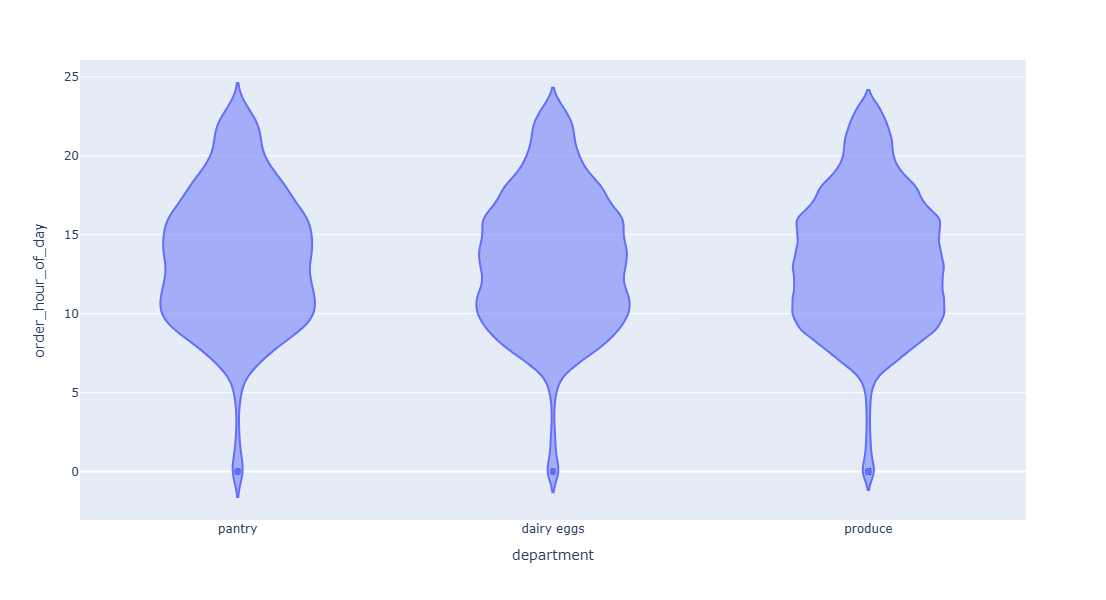

In [47]:
import plotly.express as px

fig_violin = px.violin(
    df_violin
    ,x='department'
    ,y='order_hour_of_day'
)
fig_violin.update_layout(
    height=600
)
fig_violin.show()